In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
# Load your dataset
ds = pd.read_csv('datasets.csv')  

In [3]:
ds.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,1
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,1
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,1
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,1
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


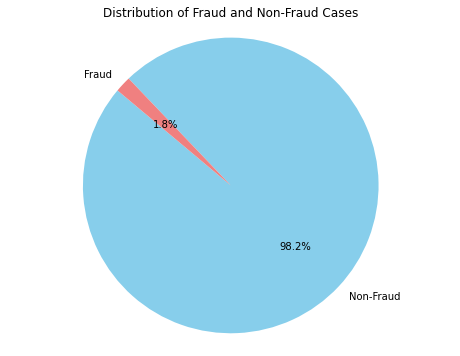

In [7]:
fraud_percentage = ds['fraud'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6))
plt.pie(fraud_percentage, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Distribution of Fraud and Non-Fraud Cases')
plt.axis('equal')  
plt.show()

In [5]:
print((ds.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       1.018676
6  '6'       1.486517
5  '5'       1.636282
3  '3'       1.725673
1  '1'       1.740896
4  '4'       1.806008
2  '2'       1.814105
0  '0'       2.528548


In [6]:
print("Unique zipCodeOri values: ",ds.zipcodeOri.nunique())
print("Unique zipMerchant values: ",ds.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = ds.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [7]:
data_reduced.columns


Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [8]:
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,1
1,0,2753,2,2,30,12,39.68,1
2,0,2285,4,1,18,12,26.89,1
3,0,1650,3,2,30,12,17.25,1
4,0,3585,5,2,30,12,35.72,1


In [9]:
X = data_reduced.drop(['fraud'],axis=1)
Y = ds['fraud']
print(X.head(),"\n")
print(Y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    1
1    1
2    1
3    1
4    1
Name: fraud, dtype: int64


In [10]:
Y[Y==1].count()

10415

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)


print("Classification Report for K-Nearest Neighbours: \n", classification_report(Y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(Y_test,y_pred))


c:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    116882
           1       0.82      0.45      0.58      2047

    accuracy                           0.99    118929
   macro avg       0.91      0.73      0.79    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix of K-Nearest Neigbours: 
 [[116678    204]
 [  1119    928]]


In [13]:
accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy of the classifier: {accuracy:.2%}")

Accuracy of the classifier: 98.89%


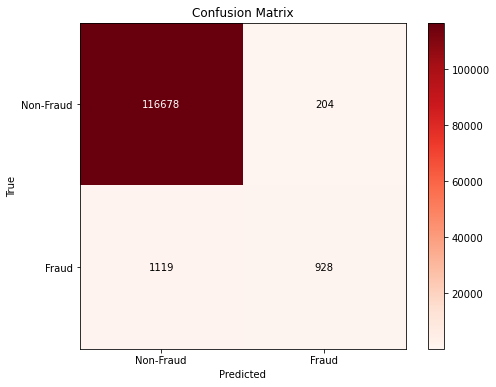

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Non-Fraud', 'Fraud']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'  
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color=color)

plt.show()


In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [17]:
print("Classification Report for Random Forest: \n", classification_report(Y_test, y_pred_rf))
print("Confusion Matrix of Random Forest: \n", confusion_matrix(Y_test, y_pred_rf))


Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    116882
           1       0.90      0.78      0.83      2047

    accuracy                           0.99    118929
   macro avg       0.95      0.89      0.92    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix of Random Forest: 
 [[116705    177]
 [   454   1593]]


In [18]:
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Accuracy of the Random Forest classifier: {accuracy_rf:.2%}")

Accuracy of the Random Forest classifier: 99.47%


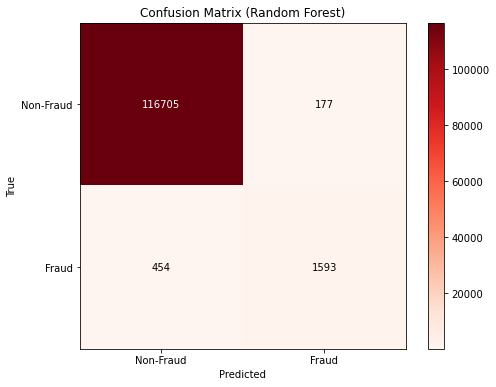

In [19]:
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(Y_test, y_pred_rf)

plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()

classes_rf = ['Non-Fraud', 'Fraud']
tick_marks_rf = np.arange(len(classes_rf))

plt.xticks(tick_marks_rf, classes_rf)
plt.yticks(tick_marks_rf, classes_rf)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes_rf)):
    for j in range(len(classes_rf)):
        color = 'white' if cm_rf[i, j] > cm_rf.max() / 2 else 'black'
        plt.text(j, i, str(cm_rf[i, j]), ha='center', va='center', color=color)

plt.show()

In [20]:
import joblib
joblib.dump(rf_classifier, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [21]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [22]:
dt_classifier.fit(X_train, Y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [23]:
print("Classification Report for Decision Tree: \n", classification_report(Y_test, y_pred_dt))
print("Confusion Matrix of Decision Tree: \n", confusion_matrix(Y_test, y_pred_dt))

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    116882
           1       0.78      0.80      0.79      2047

    accuracy                           0.99    118929
   macro avg       0.89      0.90      0.89    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix of Decision Tree: 
 [[116416    466]
 [   415   1632]]


In [24]:
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree classifier: {accuracy_dt:.2%}")

Accuracy of the Decision Tree classifier: 99.26%


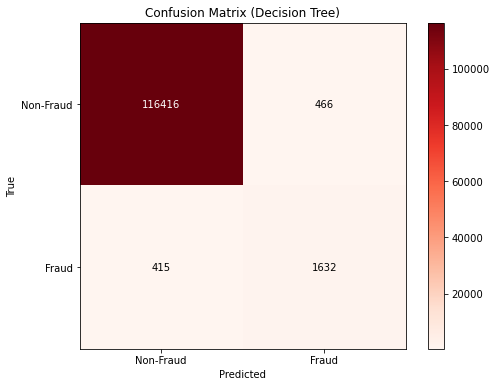

In [25]:
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(Y_test, y_pred_dt)

plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Decision Tree)')
plt.colorbar()

classes_dt = ['Non-Fraud', 'Fraud']
tick_marks_dt = np.arange(len(classes_dt))

plt.xticks(tick_marks_dt, classes_dt)
plt.yticks(tick_marks_dt, classes_dt)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes_dt)):
    for j in range(len(classes_dt)):
        color = 'white' if cm_dt[i, j] > cm_dt.max() / 2 else 'black'
        plt.text(j, i, str(cm_dt[i, j]), ha='center', va='center', color=color)

plt.show()

In [26]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, Y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [27]:
print("Classification Report for Naive Bayes: \n", classification_report(Y_test, y_pred_nb))
print("Confusion Matrix of Naive Bayes: \n", confusion_matrix(Y_test, y_pred_nb))

Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    116882
           1       0.43      0.56      0.49      2047

    accuracy                           0.98    118929
   macro avg       0.71      0.77      0.74    118929
weighted avg       0.98      0.98      0.98    118929

Confusion Matrix of Naive Bayes: 
 [[115373   1509]
 [   903   1144]]


In [28]:
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print(f"Accuracy of the Naive Bayes classifier: {accuracy_nb:.2%}")

Accuracy of the Naive Bayes classifier: 97.97%


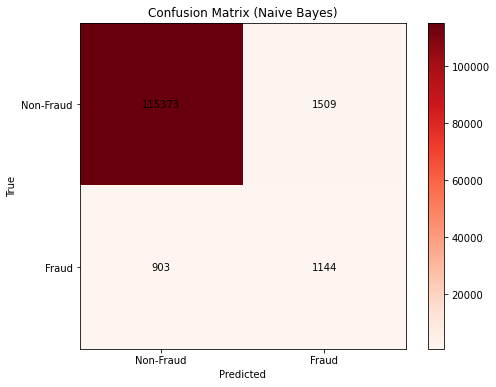

In [29]:
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(Y_test, y_pred_nb)

plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()

classes_nb = ['Non-Fraud', 'Fraud']
tick_marks_nb = np.arange(len(classes_nb))

plt.xticks(tick_marks_nb, classes_nb)
plt.yticks(tick_marks_nb, classes_nb)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes_nb)):
    for j in range(len(classes_nb)):
        color = 'black' if cm_nb[i, j] > cm_nb.max() / 2 else 'black'
        plt.text(j, i, str(cm_nb[i, j]), ha='center', va='center', color=color)

plt.show()

In [30]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [31]:
y_pred_mlp = mlp_classifier.predict(X_test)


In [32]:
print("Classification Report for MLP Classifier: \n", classification_report(Y_test, y_pred_mlp))
print("Confusion Matrix of MLP Classifier: \n", confusion_matrix(Y_test, y_pred_mlp))


Classification Report for MLP Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    116882
           1       0.82      0.75      0.78      2047

    accuracy                           0.99    118929
   macro avg       0.91      0.87      0.89    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix of MLP Classifier: 
 [[116543    339]
 [   506   1541]]


In [33]:
accuracy_mlp = accuracy_score(Y_test, y_pred_mlp)
print(f"Accuracy of the MLP Classifier: {accuracy_mlp:.2%}")

Accuracy of the MLP Classifier: 99.29%


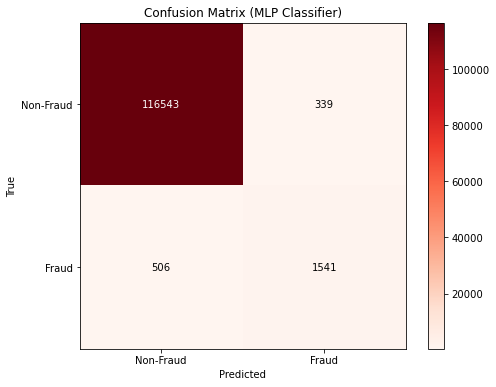

In [34]:
plt.figure(figsize=(8, 6))
cm_mlp = confusion_matrix(Y_test, y_pred_mlp)

plt.imshow(cm_mlp, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix (MLP Classifier)')
plt.colorbar()

classes_mlp = ['Non-Fraud', 'Fraud']
tick_marks_mlp = range(len(classes_mlp))

plt.xticks(tick_marks_mlp, classes_mlp)
plt.yticks(tick_marks_mlp, classes_mlp)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes_mlp)):
    for j in range(len(classes_mlp)):
        color = 'white' if cm_mlp[i, j] > cm_mlp.max() / 2 else 'black'
        plt.text(j, i, str(cm_mlp[i, j]), ha='center', va='center', color=color)

plt.show()

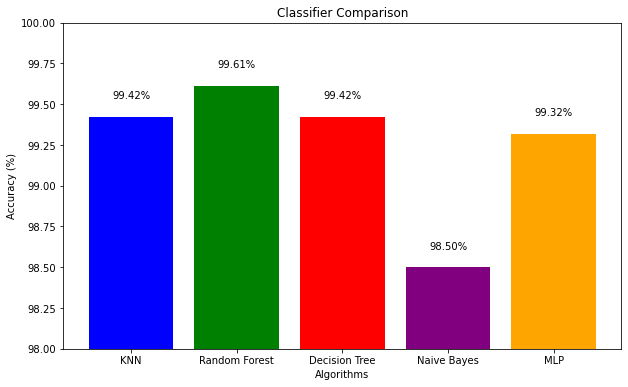

In [35]:
import matplotlib.pyplot as plt

accuracies = [99.42, 99.61, 99.42, 98.50, 99.32]

classifiers = ['KNN', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'MLP']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Classifier Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.1, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.ylim(98, 100)  

plt.show()


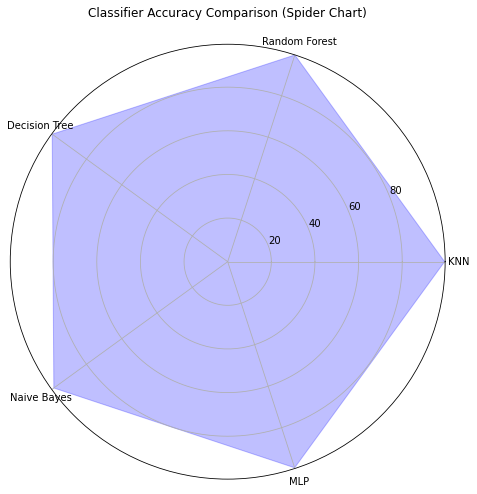

In [36]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = [99.42, 99.61, 99.42, 98.50, 99.32]

classifiers = ['KNN', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'MLP']

num_classifiers = len(classifiers)

angles = np.linspace(0, 2 * np.pi, num_classifiers, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, accuracies + accuracies[:1], color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(classifiers)

plt.title('Classifier Accuracy Comparison (Spider Chart)')
plt.show()


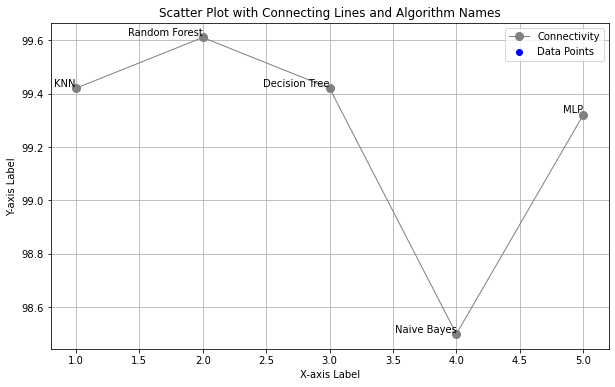

In [37]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]
y_values = [99.42, 99.61, 99.42, 98.50, 99.32]
algorithm_names = ['KNN', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'MLP']

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')
plt.plot(x_values, y_values, color='gray', linestyle='-', linewidth=1, marker='o', markersize=8, label='Connectivity')

for i, txt in enumerate(algorithm_names):
    plt.annotate(txt, (x_values[i], y_values[i]), ha='right', va='bottom', fontsize=10, color='black')

plt.title('Scatter Plot with Connecting Lines and Algorithm Names')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.legend()
plt.grid(True)
plt.show()
